In [1]:
from libmlops.data.data_loading import load_csv_data
from libmlops.data.data_preprocessing import get_xy

# Load dataset
file_path = "../data/external/pima-indians-diabetes.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
dataset = load_csv_data(file_path, names=names)

# explore_dataset(dataset)

X, Y = get_xy(dataset)

In [2]:
from numpy import set_printoptions
from libmlops.features.feature_evaluation import (
    get_feature_importance,
    get_k_best_features,
    get_recursive_feature_elimination,
    get_linear_regression,
    get_decision_tree,
)

set_printoptions(precision=2)
print("get_feature_importance", get_feature_importance(X, Y, verbose=False))
print("get_k_best_features", get_k_best_features(X, Y, verbose=False))
print(
    "get_recursive_feature_elimination",
    get_recursive_feature_elimination(X, Y, verbose=False),
)
print("get_linear_regression", get_linear_regression(X, Y, verbose=False))
print("get_decision_tree", get_decision_tree(X, Y, verbose=False))

get_feature_importance [0.24 1.   0.19 0.03 0.   0.43 0.28 0.46]
get_k_best_features [0.17 1.   0.   0.   0.05 0.33 0.1  0.2 ]
get_recursive_feature_elimination [0.14 0.43 0.71 1.   0.86 0.29 0.   0.57]
get_linear_regression [0.15 0.06 0.   0.02 0.01 0.1  1.   0.03]
get_decision_tree [0.11 1.   0.26 0.   0.09 0.72 0.3  0.36]


In [3]:
from libmlops.utils.classifier_evaluation import features_evaluation

features = []
# 1. Comment this out if you want to disable feature selection
features = features_evaluation(X, Y, verbose=True)

features
# 2. Comment this out if you want to test integer indices
# features = [dataset.columns[v] for v in features]

features
from libmlops.utils.features_evaluation import keep_features

# 1. Comment this out if you want to disable feature selection
X = keep_features(dataset, features)
X

LR [1]
LDA [1]
KNN [1]
CART [1, 5, 7]
NB [1]
SVM [0, 1, 2, 3, 4, 5, 7]
[1, 5, 7, 0, 2, 3, 4]


,preg,plas,pres,skin,test,mass,age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63
764,2,122,70,27,0,36.8,27
765,5,121,72,23,112,26.2,30
766,1,126,60,0,0,30.1,47


LR: 0.764217 (0.053882)
LDA: 0.765516 (0.055104)
KNN: 0.726504 (0.038093)
CART: 0.662765 (0.052075)
NB: 0.746087 (0.060579)
SVM: 0.651059 (0.003418)


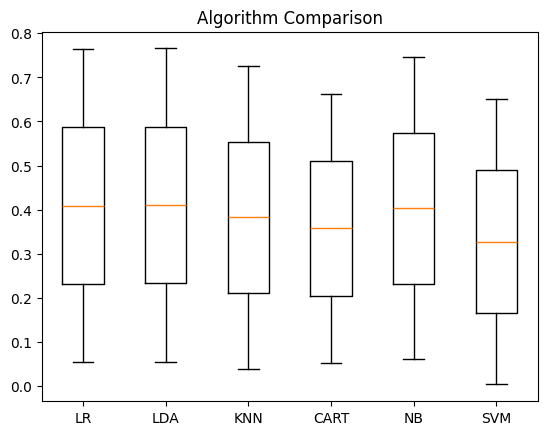

In [4]:
from libmlops.utils.classifier_evaluation import (
    algorithm_evaluation,
    compare_algorithms,
)

results, algors = algorithm_evaluation(X, Y, verbose=True)
compare_algorithms(results, algors)

In [5]:
from libmlops.data.data_preprocessing import split_train_test_xy

X_train, X_validation, Y_train, Y_validation = split_train_test_xy(X, Y, random_state=1)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from libmlops.models.model_training import train_model

model = LinearDiscriminantAnalysis()
print("Training model")
train_model(model, X_train, Y_train)

Training model


Evaluating model
Accuracy score:  0.7792207792207793 

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

Cross-validation: 0.740430 Mean (0.039710 Standard)
Confusion Matrix:
 [[0.91 0.09]
 [0.45 0.55]]


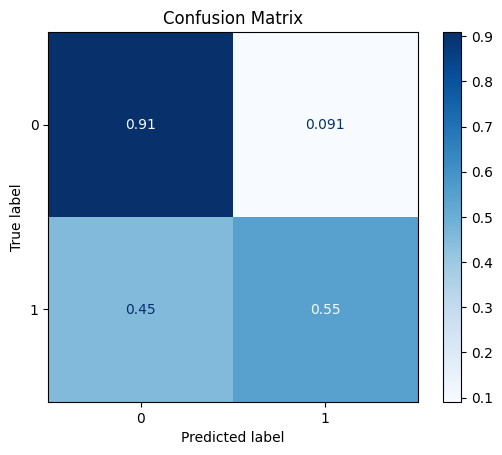

In [7]:
from libmlops.models.model_evaluation import (
    evaluate_classifier_model,
    cross_validate_model,
    confusion_matrix_model,
    plot_confusion_matrix,
)

print("Evaluating model")
accuracy, report = evaluate_classifier_model(model, X_validation, Y_validation)
print("Accuracy score: ", accuracy, "\n")
print("Classification report:\n", report)

cv_results_mean, cv_results_std = cross_validate_model(
    model, X_validation, Y_validation
)
print("Cross-validation: %f Mean (%f Standard)" % (cv_results_mean, cv_results_std))

cm = confusion_matrix_model(model, X_validation, Y_validation)
print("Confusion Matrix:\n", cm)
plot_confusion_matrix(cm, model)

In [8]:
import pandas as pd
from libmlops.utils.features_evaluation import keep_features

names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age"]
data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],
    [0, 137, 40, 35, 168, 43.1, 2.288, 33],
    [3, 78, 50, 32, 88, 31.0, 0.248, 26],
    [2, 197, 70, 45, 543, 30.5, 0.158, 53],
    [8, 125, 96, 0, 0, 0.0, 0.232, 54],
    [10, 168, 74, 0, 0, 38.0, 0.537, 34],
    [1, 189, 60, 23, 846, 30.1, 0.398, 59],
]
df = pd.DataFrame(data, columns=names)

if features != []:
    df = keep_features(df, features)
    print(features, df.columns)

for index, row in df.iterrows():
    # test the model with 1 row
    print(model.predict(pd.DataFrame([row.values], columns=row.index)))

[1, 5, 7, 0, 2, 3, 4] Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'age'], dtype='object')
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
